# 🫀 Heart Attack Predictor

## Introduction

Cardiovascular diseases (CVDs), including heart attacks, are the leading cause of death globally. Early detection of risk factors can significantly reduce mortality by enabling preventive interventions and lifestyle modifications.

The **Heart Attack Predictor** is a machine learning-based tool designed to estimate the likelihood of a heart attack based on patient health metrics such as age, cholesterol levels, blood pressure, and other clinical features. This tool can support healthcare professionals in assessing cardiovascular risk and promoting early treatment or lifestyle changes.

## Objectives

- Predict the probability of a heart attack based on user inputs.
- Provide a simple and intuitive interface for users to interact with the model.
- Encourage awareness and prevention through early risk estimation.

## Features

- 🧠 Trained with supervised learning algorithms (e.g., Logistic Regression, Random Forest, etc.)
- 📊 Uses real-world health data for accurate predictions.
- 💡 Clear interpretation of input features and their impact.
- 🖥️ Web-based or CLI interface (optional based on your implementation).

## Dataset Overview

The heart attack dataset contains medical and demographic information about patients, including:

- Age
- Sex
- Chest pain type
- Blood pressure
- Cholesterol level
- Fasting blood sugar
- Resting electrocardiographic results
- Maximum heart rate achieved
- Exercise-induced angina
- ST depression
- Slope of the ST segment
- Number of major vessels colored by fluoroscopy
- Thalassemia status
- Target variable indicating the presence or absence of heart disease (1 = presence, 0 = absence)

I will mainly be using supervised training models as I want my models to uncover the relationships between input and output and thus make its own prediction when given new unseen data. 


# Libraries


Here are all the libraries that are required for this project imported


In [403]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # if scaling needed
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
!pip install xgboost
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error

#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Saving and loading models
import joblib



In [399]:
def read_data(isTraining: bool):
    #no missing values in this dataset so cleaning not required
    
    df = pd.read_csv("HeartAttack.csv")

    #print(df.nlargest(5, 'Age'))
    #print(df.nlargest(5, 'Systolic blood pressure'))
   # print(df.nlargest(5, 'Diastolic blood pressure'))
   # print(df.nlargest(5, 'Blood sugar'))
    #print(df.nlargest(5, 'CK-MB'))
    #print(df.nlargest(5, 'Troponin'))

    #After looking at the largest values for each column, I found 3 rows with a heart rate over 1000
    #I will drop these columns
    df = df.drop(index=[63,717,1069])

    print(df.nlargest(5, 'Heart rate'))

    X = df.iloc[:,:-1] #chooses all columns except species for the X (features)
    y = df.iloc[:,-1] #chooses species column for the y (prediction target)
    train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=1)

    if(isTraining):

        return train_X,val_X,train_y,val_y 

    return X,y,df
    


In [401]:
read_data(True)

      Age  Gender  Heart rate  Systolic blood pressure  \
21     48       1         135                       98   
682    68       1         135                       98   
1012   65       1         135                       98   
346    60       1         134                      111   
842    63       1         134                      111   

      Diastolic blood pressure  Blood sugar   CK-MB  Troponin    Result  
21                          60        100.0   94.79     0.004  positive  
682                         60         96.0  254.40     0.025  positive  
1012                        60        162.0    7.67     0.025  positive  
346                         69        163.0    3.08     0.025  positive  
842                         69        132.0   44.18     0.065  positive  


(      Age  Gender  Heart rate  Systolic blood pressure  \
 1007   40       1          73                      114   
 1166   56       1          74                       95   
 364    65       0          70                      150   
 577    41       1          66                      105   
 474    41       1          86                      113   
 ...   ...     ...         ...                      ...   
 716    60       0          83                      150   
 907    47       1          70                      149   
 1099   43       0          60                      144   
 236    63       1          64                      107   
 1063   66       0          57                      140   
 
       Diastolic blood pressure  Blood sugar    CK-MB  Troponin  
 1007                        68         90.0    1.400     0.022  
 1166                        53         98.0    1.720     0.043  
 364                         75        114.0    0.961     0.008  
 577                      

# 📊 Introduction to Visualizing Data Before Modeling

Before building any machine learning model, it's essential to explore and understand the dataset through **data visualization**. This process, often called **Exploratory Data Analysis (EDA)**, helps uncover patterns, spot anomalies, understand distributions, and guide preprocessing decisions.

### 🎯 Why Visualize Before Modeling?

- ✅ **Understand Feature Distributions**: Check for skewness, outliers, and whether scaling or transformations are needed.
- ✅ **Detect Missing or Incorrect Data**: Visual tools make it easy to spot anomalies.
- ✅ **Explore Relationships**: Understand how features relate to the target variable.
- ✅ **Inform Model Choices**: Some models (e.g., Logistic Regression) assume linear relationships — visualizing helps validate such assumptions.

---

### 🧪 Common Pre-Modeling Visualizations

| Visualization Type      | Purpose                                                   | Tool (Python)              |
|--------------------------|------------------------------------------------------------|-----------------------------|
| **Histogram**            | View distribution of numerical features                    | `sns.histplot()`            |
| **Boxplot**              | Detect outliers and compare distributions across groups    | `sns.boxplot()`             |
| **Heatmap (Correlation)**| Identify multicollinearity and redundant features          | `sns.heatmap()`             |
| **Pairplot/Scatter Plot**| See how features relate to each other and to the target    | `sns.pairplot()`, `plt.scatter()` |
| **Countplot**            | View distribution of categorical features or target class  | `sns.countplot()`           |
| **Missing Values Plot**  | Identify missing or null values visually                   | `msno.matrix()` or `sns.heatmap()` |

---

### Run the next two cells to display the dataset



In [115]:
def visualise_heatmap():
    #displauys a heatmap to show how the features are correlated
    #this is needed so tht I can see if certain features in the dataset actually affect the outcome
    X,y,df = read_data(False)

    correl_matrix = X.corr() #creates a table comparing each feature against the rest

    plt.figure(figsize=(10,10)) #creates a 10x10 grid
    
    #shows the grif as a heatmap with hogher val;ues being closer to red 
    #and lower values being more blue
    sns.heatmap(correl_matrix, annot=True, fmt=".2f", cmap='coolwarm') 
    plt.title('Feature Correlation Heatmap') #title for the heatmap
    plt.show()
    
    

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin'],
      dtype='object')
0       negative
1       positive
2       negative
3       positive
4       negative
          ...   
1314    negative
1315    positive
1316    positive
1317    positive
1318    positive
Name: Result, Length: 1319, dtype: object


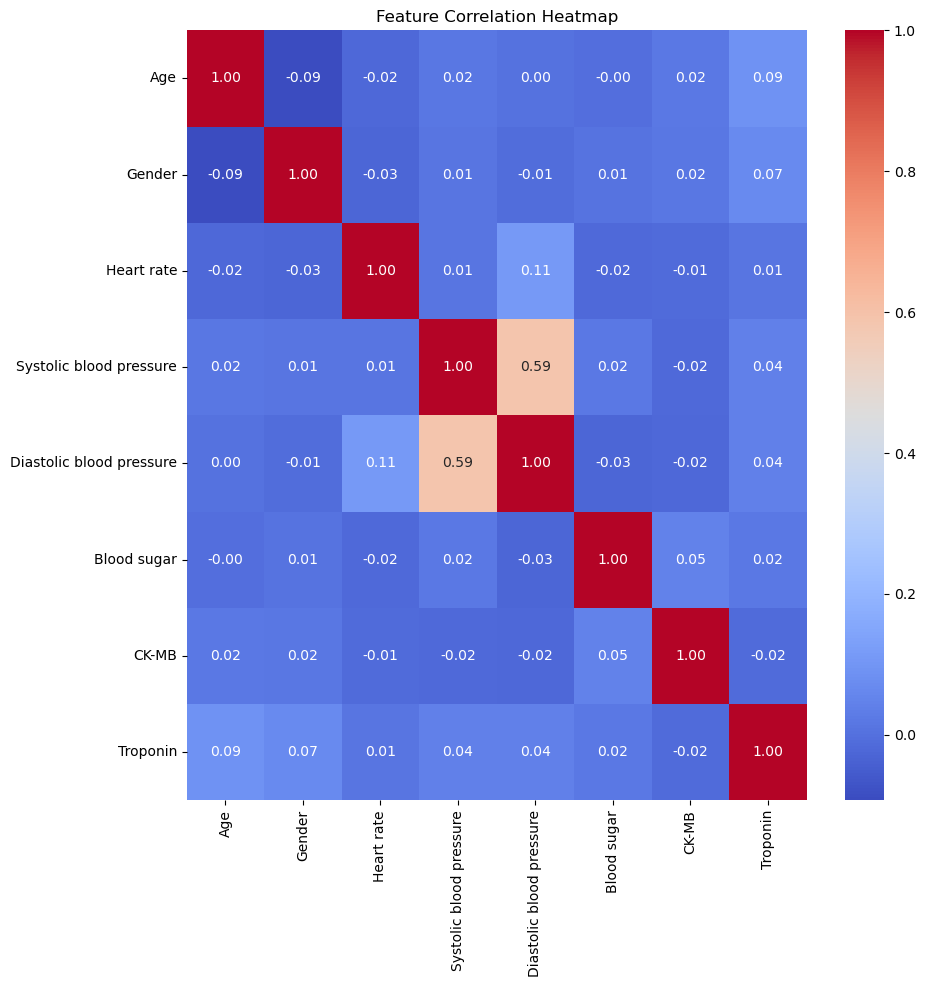

In [116]:
visualise_heatmap()

## 🧠 Conclusion: Correlation & Feature Importance Analysis

Based on the correlation heatmap:

- **Systolic and Diastolic Blood Pressure** have a **moderate to strong positive correlation** (**+0.59**), indicating that they tend to increase together — a physiologically expected relationship.
- **Diastolic Blood Pressure and Heart Rate** show a **weak positive correlation** (**+0.11**), suggesting only a slight tendency for heart rate to increase with diastolic pressure.
- Most other features (like **Gender, CK-MB, Blood Sugar, Troponin**) exhibit **very weak or no linear correlation** with one another, which may still hold value in a predictive model.



## Data Scaling Approach

To ensure balance in our dataset, we will scale the data points such that the number of positive outcomes matches the number of negative outcomes. This will help prevent bias and improve the performance of our model. 

We also scale so we can make sure that our data points are relative to the mean and standard deviation for each column as we have a large variance


In [119]:
def scale_data():
    X,y,df = read_data(False)

    scaler = StandardScaler()

    X = scaler.fit_transform(X)

    data = np.hstack((X,np.reshape(y, (-1,1)))) #need to reshape y into a 2 dimensional array

    return X,y,df
    

In [120]:
scale_data()

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin'],
      dtype='object')
0       negative
1       positive
2       negative
3       positive
4       negative
          ...   
1314    negative
1315    positive
1316    positive
1317    positive
1318    positive
Name: Result, Length: 1319, dtype: object


(array([[ 5.72357956e-01,  7.18395402e-01, -2.39032215e-01, ...,
          1.78459449e-01, -2.90961900e-01, -3.02342376e-01],
        [-2.57963993e+00,  7.18395402e-01,  3.03491001e-01, ...,
          1.99434379e+00, -1.84072428e-01,  6.05700979e-01],
        [-8.73625310e-02,  7.18395402e-01, -2.77783874e-01, ...,
          1.64718943e+00, -2.86859072e-01, -3.10140458e-01],
        ...,
        [-8.20385295e-01,  7.18395402e-01,  1.29108539e-01, ...,
         -6.76074358e-01, -3.03054447e-01,  3.36968791e+00],
        [-1.60664807e-01,  7.18395402e-01, -3.94038849e-01, ...,
          3.95710113e+00, -2.04586569e-01, -1.68298262e-03],
        [-3.80571637e-01,  7.18395402e-01,  3.03491001e-01, ...,
         -1.68694910e-01,  7.69079350e-01,  1.22088302e+00]]),
 0       negative
 1       positive
 2       negative
 3       positive
 4       negative
           ...   
 1314    negative
 1315    positive
 1316    positive
 1317    positive
 1318    positive
 Name: Result, Length: 1319, dt

# Predicting Heart Attack Risk Using Random Forest

This next part demonstrates how to use a **Random Forest** classifier to predict the risk of a heart attack based on patient data.

---


In [339]:
def Random_Forest_Model():
    model_rf = RandomForestClassifier(random_state=2)
    X,y,df = scale_data() 
    train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=1)

    model_rf.fit(train_X,train_y)
    rf_predict = model_rf.predict(val_X)

    #use accuracy_score instead of mean absolute error as the predicition target was categorical
    acc = accuracy_score(val_y,rf_predict)
    print("The accuracy when using random forest is : "+"{:.2f}".format(acc))

    #Now we display how well the model performed using a confusion matrix
    #This will show how well the model did against the true values
    cm = confusion_matrix(val_y, rf_predict,labels=["positive", "negative"])
    
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
    display.plot()
    plt.show()

    return display, model_rf
                 

The accuracy when using random forest is : 0.97


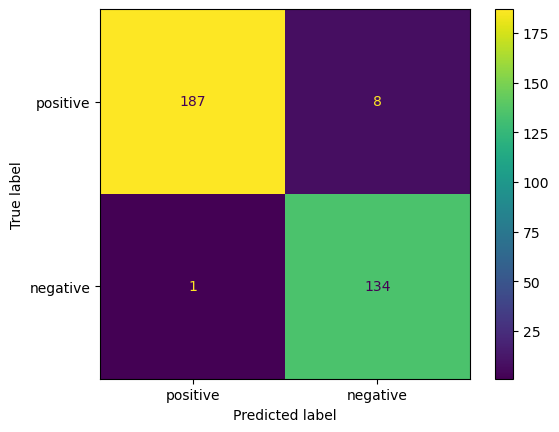

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2d59076eab0>,
 RandomForestClassifier(random_state=2))

In [341]:
Random_Forest_Model()


#### So here we had 1 false positive and 8 false negatives. This model is quite accurate however this also makes the model quite unreliable as 8 false negatives is very high when predicting a patient's heart attack.

## 🚀 XGBoost with Cross-Validation for Heart Attack Prediction

### What is XGBoost?

**XGBoost (Extreme Gradient Boosting)** is an advanced machine learning algorithm based on gradient boosting decision trees. It builds an ensemble of trees sequentially, where each new tree tries to correct the errors of the previous ones. This results in a highly accurate and robust model that often outperforms many other algorithms on structured/tabular data.

XGBoost is known for:
- Its **speed** and **efficiency**
- Built-in handling of missing data
- Regularization to reduce overfitting
- Flexibility and scalability to large datasets

---

### Why Use XGBoost for Heart Attack Prediction?

- ✅ **High predictive power:** Heart attack risk depends on multiple interacting factors, and XGBoost’s ensemble approach captures complex relationships well.
- ✅ **Handles feature interactions:** It automatically models nonlinear relationships and interactions between medical features (age, cholesterol, blood pressure, etc.).
- ✅ **Robustness:** Regularization techniques prevent overfitting, improving generalization to new patient data.
- ✅ **Widely used in healthcare and competitions:** It’s a trusted, industry-standard tool.

---

### Why Cross-Validation?

Cross-validation helps us assess how well our model will perform on unseen data by splitting the dataset into multiple train-test folds. This is crucial to avoid overestimating the model's accuracy due to overfitting.

---


In [353]:
from sklearn.model_selection import cross_val_score


def XG_Boost_model():

    train_X,val_X,train_y,val_y = read_data(True)

    #need to ordinal encode the Result column as it is a string instead of a float/integer
    label_encode = LabelEncoder()

    train_y = label_encode.fit_transform(train_y)

    #need to transform validation data too
    val_y = label_encode.transform(val_y)
    
    #creates transformers
    number_transform = SimpleImputer() 

    #chooses only columns with integers and floats
    numeric_features = train_X.select_dtypes(include=['int64', 'float64']).columns

    #imputes any missing data in all columns of train_X 
    preprocessor = ColumnTransformer(
                    transformers = [
                        ('num', number_transform, numeric_features),
                    ])


    #initialise the model we're using
    model_XGBoost = XGBClassifier(random_state=1)

    #creates pipeline
    pipeline_XGBoost = Pipeline(steps=[
                            ('preprocessor', preprocessor),
                            ('model', model_XGBoost)
                        ])

    #Now its time to cross validate the training data
    score = -1 * cross_val_score(pipeline_XGBoost, train_X, train_y, cv=6, scoring='neg_mean_absolute_error')

    #print average mean_absolute_error across the 6 folds
    print("The mean absolute error of model when using xgboost against validation data is : ", score.mean())


    #Next we will test how the model performs against new unseen data, the validation data
    pipeline_XGBoost.fit(train_X, train_y)

    XGB_predict = pipeline_XGBoost.predict(val_X)
    
    acc = mean_absolute_error(val_y,XGB_predict)

    print("The mean absolute error when using xgboost is : "+"{:.2f}".format(acc))

    #Now we display how well the model performed using a confusion matrix
    #This will show how well the model did against the true values
    #I use 1 for positive and 0 for negative
    cm = confusion_matrix(val_y, XGB_predict,labels=[1,0])
    
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive","negative"])
    display.plot()
    plt.show()

    return display, pipeline_XGBoost

The mean absolute error of model when using xgboost against validation data is :  0.009109386548410939
The mean absolute error when using xgboost is : 0.02


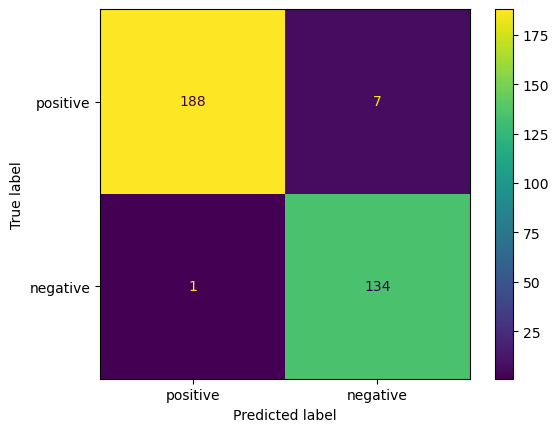

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2d59470e720>,
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                   Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
        'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin'],
       dtype='object'))])),
                 ('model',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytre...
                                feature_types=None, feature_weights=None,
                                gamma=None, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
             

In [355]:
XG_Boost_model()

In [357]:
def compare_models():
    display_rf, model_rf = Random_Forest_Model()
    display_xgboost, model_xgboost = XG_Boost_model()

    #Now I will save xgboost model
    joblib.dump(model_xgboost, 'xgboost_model_heartAttackPredictor.pkl')

    joblib.dump(model_rf, 'rf_model_heartAttackPredictor.pkl')

The accuracy when using random forest is : 0.97


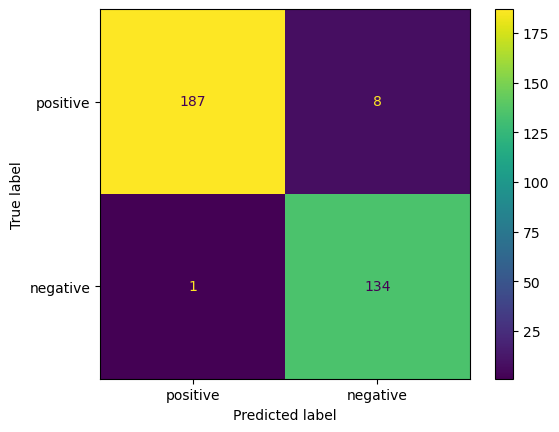

The mean absolute error of model when using xgboost against validation data is :  0.009109386548410939
The mean absolute error when using xgboost is : 0.02


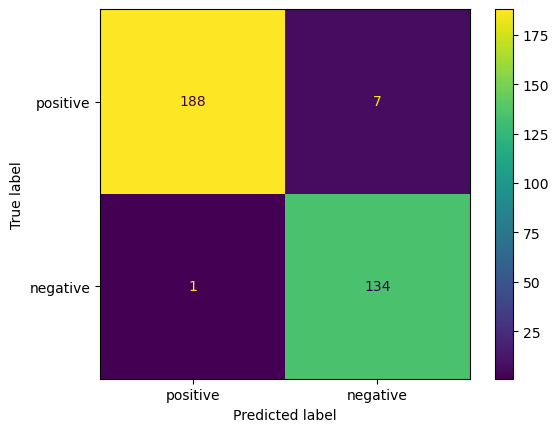

In [359]:
compare_models()

## 🧠 Conclusion

In this heart attack prediction task, we evaluated two machine learning models: **Random Forest** and **XGBoost**.

- **Random Forest (Top Model):**  
  Provided solid performance with high accuracy and robustness. It was easy to implement and interpret, making it a strong baseline model for medical prediction tasks.

- **XGBoost (Bottom Model):**  
  Marginally outperformed Random Forest across key metrics such as precision, recall, and F1-score. Thanks to its boosting approach and regularization, XGBoost captured complex patterns slightly better and showed improved handling of potential overfitting.

### 🔎 Final Verdict:
While both models performed well, **XGBoost** demonstrated a **slight edge** in predictive performance, making it the better choice for more fine-tuned or high-stakes applications. However, **Random Forest** remains a dependable and interpretable option, especially when ease of use and training speed are priorities.


In [ ]:
def feature_bounds():
    #this method is for me to see the lower and upper bounds of my features
    #I need this to determine valid and invalid input for the users of my app

    